# 1. Introdução

A análise abaixo foi feita com informações coletadas de estudantes universitários por meio de um formulário do Google que foram disponibilizados no site www.kaggle.com

Perguntas que tentaremos responder com a análise:<br>
-Existe uma disparidade de notas entre alunos de diferentes departamentos?<br>
-A altura ou o peso dos alunos influencia de alguma forma nas notas do 10º, 12º ano ou faculdade?<br>
-Há correlação entre o tempo diário de estudo e as notas?<br>
-Existe uma diferença significativa nas notas entre alunos do sexo masculino e feminino?<br>
-Alunos de diferentes gêneros têm expectativas salariais diferentes?<br>
-A situação financeira dos alunos influencia suas expectativas salariais?<br>

# 2. Carregando bibliotecas

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Anlisando estrutura do dataset

In [185]:
df = pd.read_csv('C:/PythonDSA/textos/Student Attitude and Behavior.csv')

In [186]:
df.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Certification Course                                    235 non-null    object 
 1   Gender                                                  235 non-null    object 
 2   Department                                              235 non-null    object 
 3   Height(CM)                                              235 non-null    float64
 4   Weight(KG)                                              235 non-null    float64
 5   10th Mark                                               235 non-null    float64
 6   12th Mark                                               235 non-null    float64
 7   college mark                                            235 non-null    float64
 8   hobbies                                 

In [188]:
df.describe()

,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,salary expectation
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02
mean,157.402128,60.803830,76.848511,68.775872,70.660553,3.248168e+04
std,21.510805,14.895844,13.047560,11.018192,15.727446,1.113146e+05
min,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000e+00
25%,152.000000,50.000000,70.000000,60.000000,60.000000,1.500000e+04
50%,160.000000,60.000000,80.000000,69.000000,70.000000,2.000000e+04
75%,170.000000,70.000000,86.250000,76.000000,80.000000,2.500000e+04
max,192.000000,106.000000,98.000000,94.000000,100.000000,1.500000e+06


In [189]:
df[df['Height(CM)'] < 40]

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
96,Yes,Female,BCA,4.5,42.0,85.0,90.0,85.0,Cinema,30 - 60 minute,Anytime,20000,Yes,100%,1 - 1.30 hour,30 - 60 minutes,Good,Awful,No


In [190]:
df.loc[df['Height(CM)'] < 40, 'Height(CM)']  = round(df[df['Height(CM)'] > 50]['Height(CM)'].mean(), 1)

In [191]:
df.describe()

,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,salary expectation
count,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02
mean,158.055745,60.803830,76.848511,68.775872,70.660553,3.248168e+04
std,19.036209,14.895844,13.047560,11.018192,15.727446,1.113146e+05
min,90.000000,20.000000,7.400000,45.000000,1.000000,0.000000e+00
25%,152.000000,50.000000,70.000000,60.000000,60.000000,1.500000e+04
50%,160.000000,60.000000,80.000000,69.000000,70.000000,2.000000e+04
75%,170.000000,70.000000,86.250000,76.000000,80.000000,2.500000e+04
max,192.000000,106.000000,98.000000,94.000000,100.000000,1.500000e+06


Ao fazer uma breve análise no nosso dataset vimos que nao temos valores nao nulos em nossas colunas e tivemos um valor anômalo na coluna Height(CM) que contém uma altura de 4.5(CM) de um aluno, presumo que tenha sido um erro de digitação já que é muito abaixo da altura mínima esperada para um estudante, então modifiquei seu valor para a media dos estudantes.

#  4. Análise univariada

In [192]:
quantidade_genero = df['Gender'].value_counts()

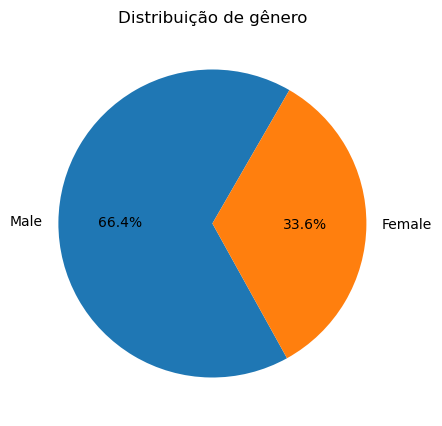

In [193]:
plt.figure(figsize = (5, 5))
plt.pie(quantidade_genero, labels = quantidade_genero.index, autopct='%1.1f%%', startangle = 60)
plt.title('Distribuição de gênero')
plt.show()

In [194]:
quantidade_prefer = df['prefer to study in'].value_counts()

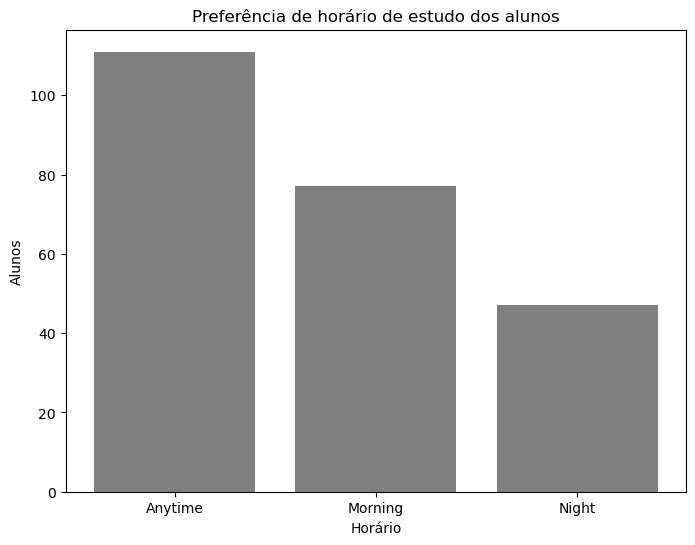

In [195]:
plt.figure(figsize = (8, 6))
plt.bar(quantidade_prefer.index, quantidade_prefer, color = 'gray')
plt.title('Preferência de horário de estudo dos alunos')
plt.xlabel('Horário')
plt.ylabel('Alunos')
plt.show()

In [196]:
quantidade_like = df['Do you like your degree?'].value_counts()

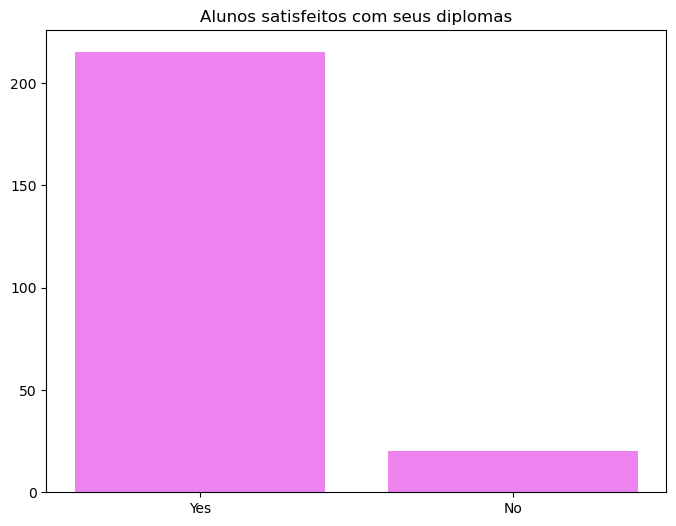

In [197]:
plt.figure(figsize = (8, 6))
plt.bar(quantidade_like.index, quantidade_like, color = 'violet')
plt.title('Alunos satisfeitos com seus diplomas')
plt.show()

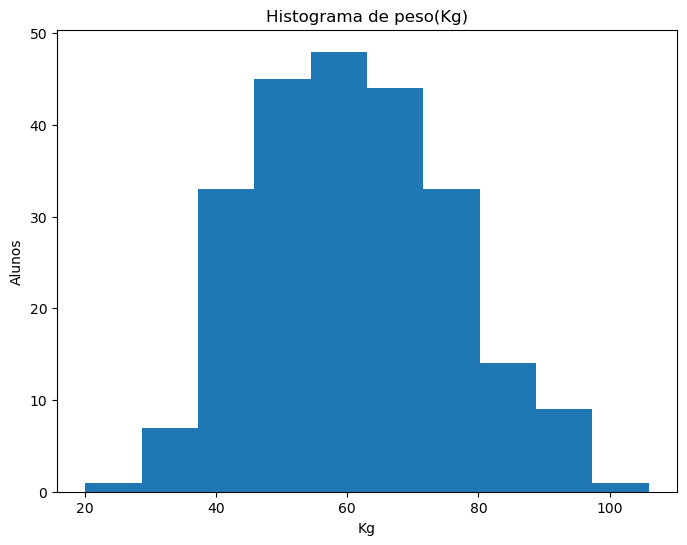

In [198]:
plt.figure(figsize = (8,6))
plt.hist(df['Weight(KG)'])
plt.title('Histograma de peso(Kg)')
plt.xlabel('Kg')
plt.ylabel('Alunos')
plt.show()

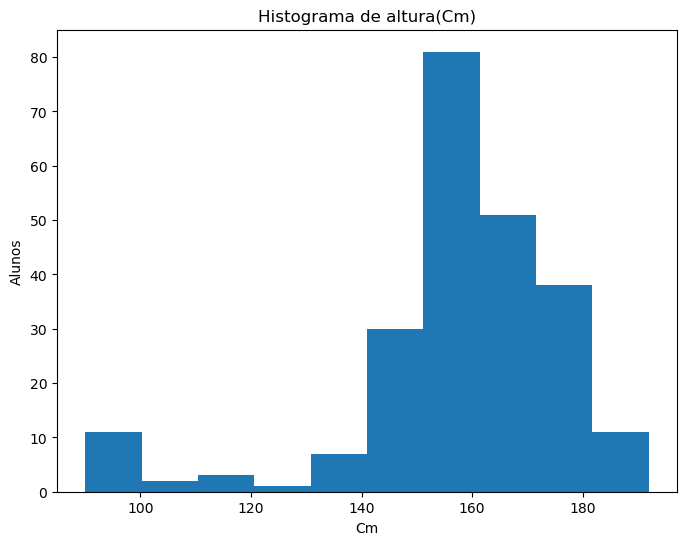

In [199]:
plt.figure(figsize = (8,6))
plt.hist(df['Height(CM)'])
plt.title('Histograma de altura(Cm)')
plt.xlabel('Cm')
plt.ylabel('Alunos')
plt.show()

####  Através de gráficos podemos tirar algumas conclusões, como, mais de 66% dos estudantes sao do gênero masculino, a maioria dos estudantes não tem preferência de horário de estudo e que sua grande parte está satisfeito com seus diplomas.

# 5. Análise bivariada

In [200]:
collegmark_department = df.groupby('Department')['college mark'].mean()

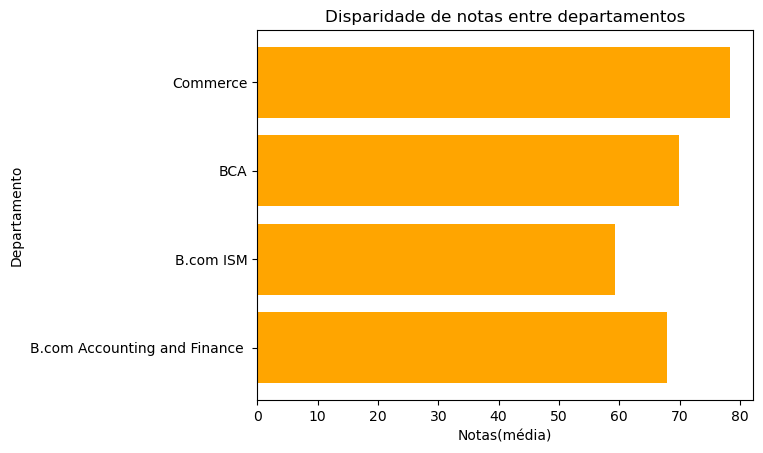

In [201]:
plt.barh(collegmark_department.index, collegmark_department, color = 'orange')
plt.title('Disparidade de notas entre departamentos')
plt.ylabel('Departamento')
plt.xlabel('Notas(média)')
plt.show()

#### Fica claro que não tem uma disparidade de notas entre alunos de diferentes departamentos

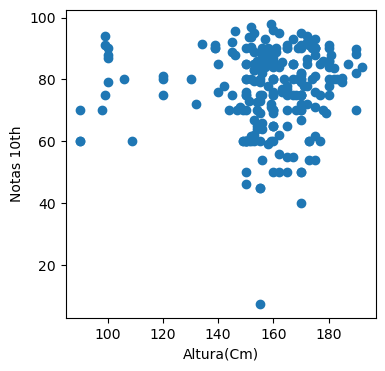

In [202]:
plt.figure(figsize = (4, 4))
plt.scatter(df['Height(CM)'], df['10th Mark'])
plt.xlabel('Altura(Cm)')
plt.ylabel('Notas 10th')
plt.show()

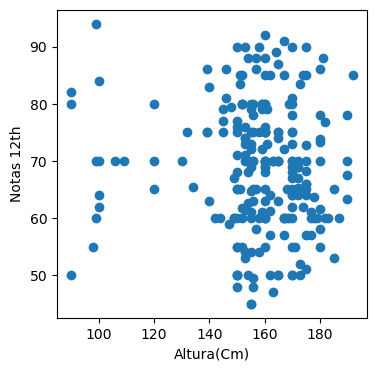

In [203]:
plt.figure(figsize = (4, 4))
plt.scatter(df['Height(CM)'], df['12th Mark'])
plt.xlabel('Altura(Cm)')
plt.ylabel('Notas 12th')
plt.show()

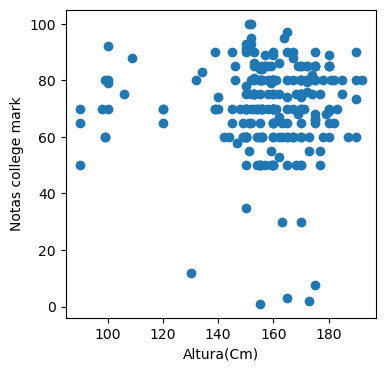

In [204]:
plt.figure(figsize = (4, 4))
plt.scatter(df['Height(CM)'], df['college mark'])
plt.xlabel('Altura(Cm)')
plt.ylabel('Notas college mark')
plt.show()

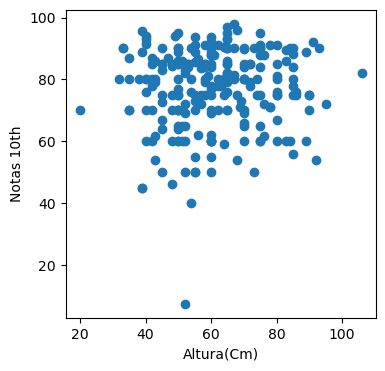

In [205]:
plt.figure(figsize = (4, 4))
plt.scatter(df['Weight(KG)'], df['10th Mark'])
plt.xlabel('Altura(Cm)')
plt.ylabel('Notas 10th')
plt.show()

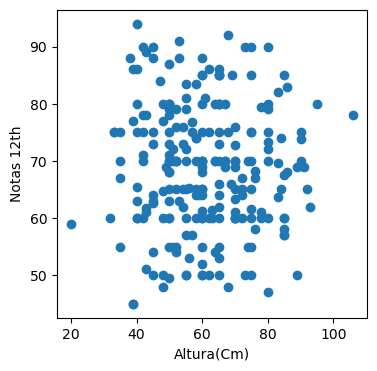

In [206]:
plt.figure(figsize = (4, 4))
plt.scatter(df['Weight(KG)'], df['12th Mark'])
plt.xlabel('Altura(Cm)')
plt.ylabel('Notas 12th')
plt.show()

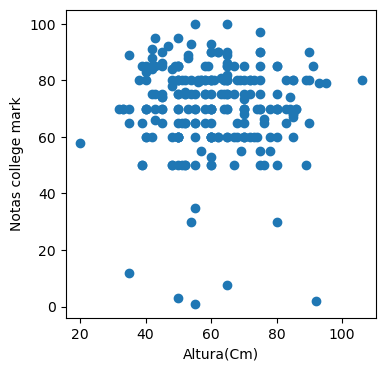

In [207]:
plt.figure(figsize = (4, 4))
plt.scatter(df['Weight(KG)'], df['college mark'])
plt.xlabel('Altura(Cm)')
plt.ylabel('Notas college mark')
plt.show()

#### Ao ver estes gráficos  não podemos afirmar que o peso ou altura influenciam nas notas

In [208]:
studing_time = df.groupby('daily studing time')['college mark'].mean()

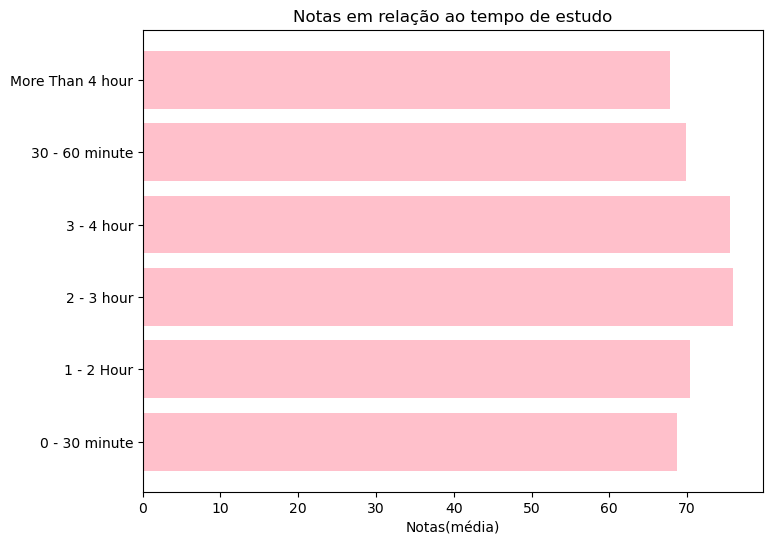

In [209]:
plt.figure(figsize = (8, 6))
plt.barh(studing_time.index, studing_time, color = 'pink')
plt.title('Notas em relação ao tempo de estudo')
plt.xlabel('Notas(média)')
plt.show()

In [210]:
df['notas_baixas'] = df['college mark'] < 70.0

In [211]:
notas_baixas = df.groupby('daily studing time')['notas_baixas'].sum()

In [212]:
total_notas = df.groupby('daily studing time')['college mark'].size()

In [213]:
porcentagem_notas_baixas = (notas_baixas / total_notas * 100).round(2)

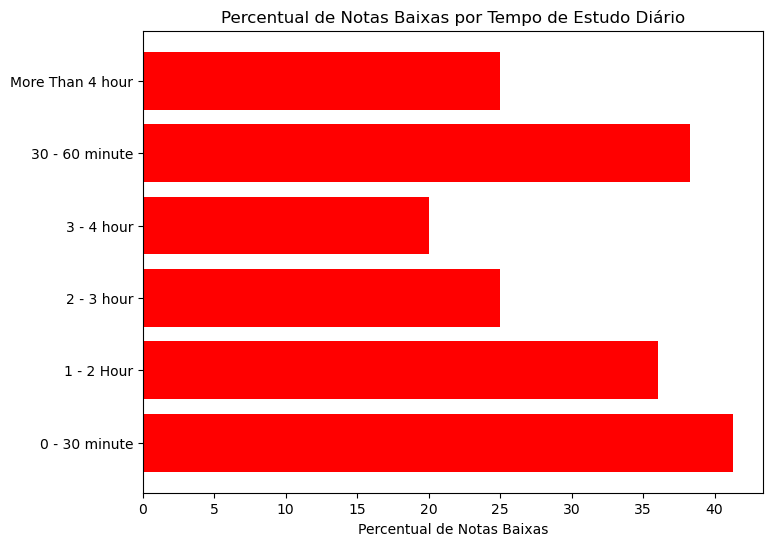

In [214]:
plt.figure(figsize = (8, 6))
plt.barh(porcentagem_notas_baixas.index, porcentagem_notas_baixas, color = 'red')
plt.title('Percentual de Notas Baixas por Tempo de Estudo Diário')
plt.xlabel('Percentual de Notas Baixas')
plt.show()

In [215]:
del df['notas_baixas']

#### No primeiro gráfico podemos observar que alunos que estudam de 2 - 3 horas ou 3 - 4 horas tem uma media maior que as outras mas nenhuma disparidade é notada, já no segundo gráfico temos que o grupo de alunos que tem o maior percentual de notas a baixo de 70.0 é o que estuda 0 - 30 minutos com mais de 40% de alunos abaixo da média

In [216]:
notas_genero = df.groupby('Gender')['college mark'].mean()

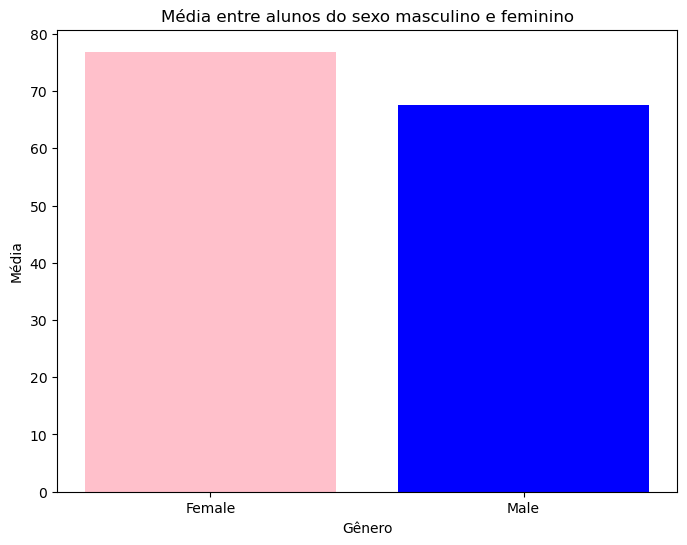

In [217]:
plt.figure(figsize = (8,6))
plt.bar(notas_genero.index, notas_genero, color = ['pink', 'blue'])
plt.title('Média entre alunos do sexo masculino e feminino')
plt.xlabel('Gênero')
plt.ylabel('Média')
plt.show()

#### Alunos do genêro feminino tem uma média de notas um pouco maior que os do genêro masculino

In [218]:
Q1 = df['salary expectation'].quantile(0.25)
Q3 = df['salary expectation'].quantile(0.75)

In [219]:
salario_outliers = df[(df['salary expectation'] > Q1 - 1.5 * (Q3 - Q1)) & (df['salary expectation'] < Q3 + 1.5 * (Q3 - Q1))]

In [220]:
salario_genero = salario_outliers.groupby('Gender')['salary expectation']

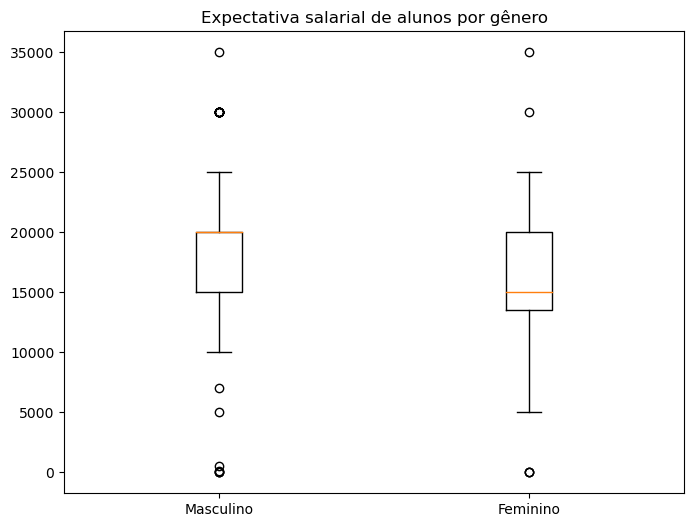

In [271]:
plt.figure(figsize = (8, 6))
plt.boxplot([salario_genero.get_group('Male'), salario_genero.get_group('Female')])
plt.title('Expectativa salarial de alunos por gênero')
plt.xticks([1, 2], ['Masculino', 'Feminino'])
plt.show()

#### Com este gráfico podemos ver que 50% dos alunos do gênero masculino tem uma expectativa salarial maior que 20000 e apenas 25% dos alunos do genêro feminino tem uma expectatica salarial de 20000

In [261]:
salario_status = salario_outliers.groupby('Financial Status')['salary expectation']

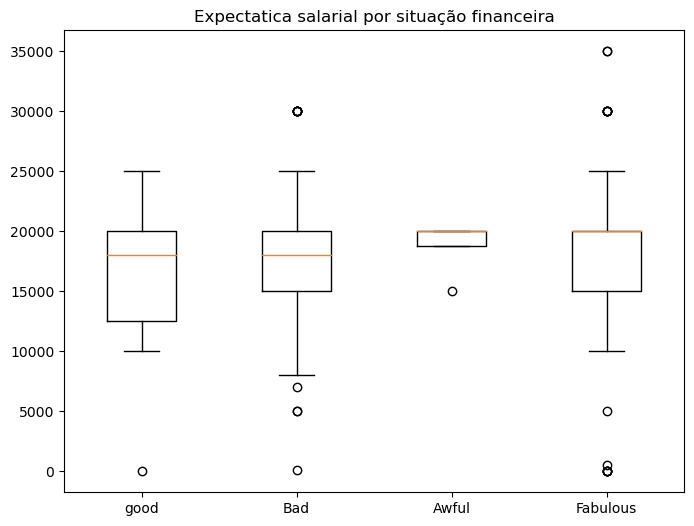

In [272]:
plt.figure(figsize = (8, 6))
plt.boxplot([salario_status.get_group('Awful'), salario_status.get_group('Bad'), salario_status.get_group('Fabulous'), salario_status.get_group('good')])
plt.title('Expectatica salarial por situação financeira')
plt.xticks([1, 2, 3, 4], ['good', 'Bad', 'Awful', 'Fabulous'])
plt.show()

#### Podemos ver que situação financeira dos alunos não tem uma influência tão significativa em suas expectativas salariais